In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from datetime import datetime
import math 

In [2]:
df_info = pd.read_csv('colect_data\colect_data\clean_data.csv')
df_info.drop(df_info[df_info['Price(Triệu/tháng)'] > 100].index, inplace = True)
df_info.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date
0,478324,Cho thuê phòng để ở tại 108/64A1 Trần Quang Di...,3.50,18.0,Quận 3,Hồ Chí Minh,20/06/2020
1,723089,"Phòng trọ,căn hộ mini đầy đủ tiện nghi ngay tr...",6.00,70.0,Quận 4,Hồ Chí Minh,21/11/2018
2,728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.30,25.0,Quận 7,Hồ Chí Minh,17/10/2018
3,745037,Cho nam thuê phòng (ghép) tại quận 10. Nhà ở t...,1.45,8.0,Quận 10,Hồ Chí Minh,03/10/2018
4,781296,Cần share lại gấp phòng trọ mới thuê tại đường...,3.00,15.0,Quận 10,Hồ Chí Minh,05/10/2018


In [3]:
giờ t có giá/m2 của một bài đăng
giá trung bình của quận
giá tốt nhất


SyntaxError: invalid syntax (3882965369.py, line 1)

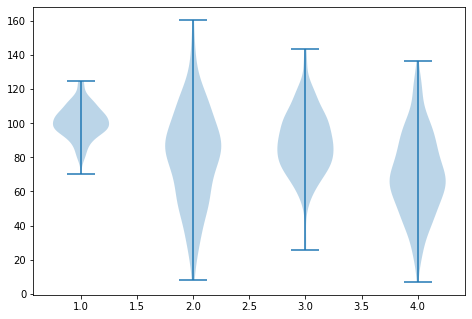

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)

## combine these different collections into a list
data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()

QUAN:  <class 'numpy.ndarray'>
Quận 3
Giá trung bình:  0.17226595744680853
Giá phù hợp:  0
*Thông tin* 
ID:  478324
Tiêu đề:  Cho thuê phòng để ở tại 108/64A1 Trần Quang Diệu, P.14, Q.3- 18m2, 3,5tr/ tháng
Giá (triệu/tháng):  3.5
Diện tích:  18.0
Ngày đăng:  2020-06-20 00:00:00
 
Quận 4
Giá trung bình:  0.12224287484510535
Giá phù hợp:  0
*Thông tin* 
ID:  723089
Tiêu đề:  Phòng trọ,căn hộ mini đầy đủ tiện nghi ngay trung tâm Q4 DT 70m2
Giá (triệu/tháng):  6.0
Diện tích:  70.0
Ngày đăng:  2018-11-21 00:00:00
 
Quận 7
Giá trung bình:  0.14527761485826
Giá phù hợp:  0
*Thông tin* 
ID:  728993
Tiêu đề:  Phòng vừa xây xong thoáng mát gần các trường ĐH Q7
Giá (triệu/tháng):  3.3
Diện tích:  25.0
Ngày đăng:  2018-10-17 00:00:00
 
Quận 10
Giá trung bình:  0.15601425847633257
Giá phù hợp:  0
*Thông tin* 
ID:  745037
Tiêu đề:  Cho nam thuê phòng (ghép) tại quận 10. Nhà ở thoáng mát, tiện nghi
Giá (triệu/tháng):  1.45
Diện tích:  8.0
Ngày đăng:  2018-10-03 00:00:00
 
Tân Bình
Giá trung bình:  0.

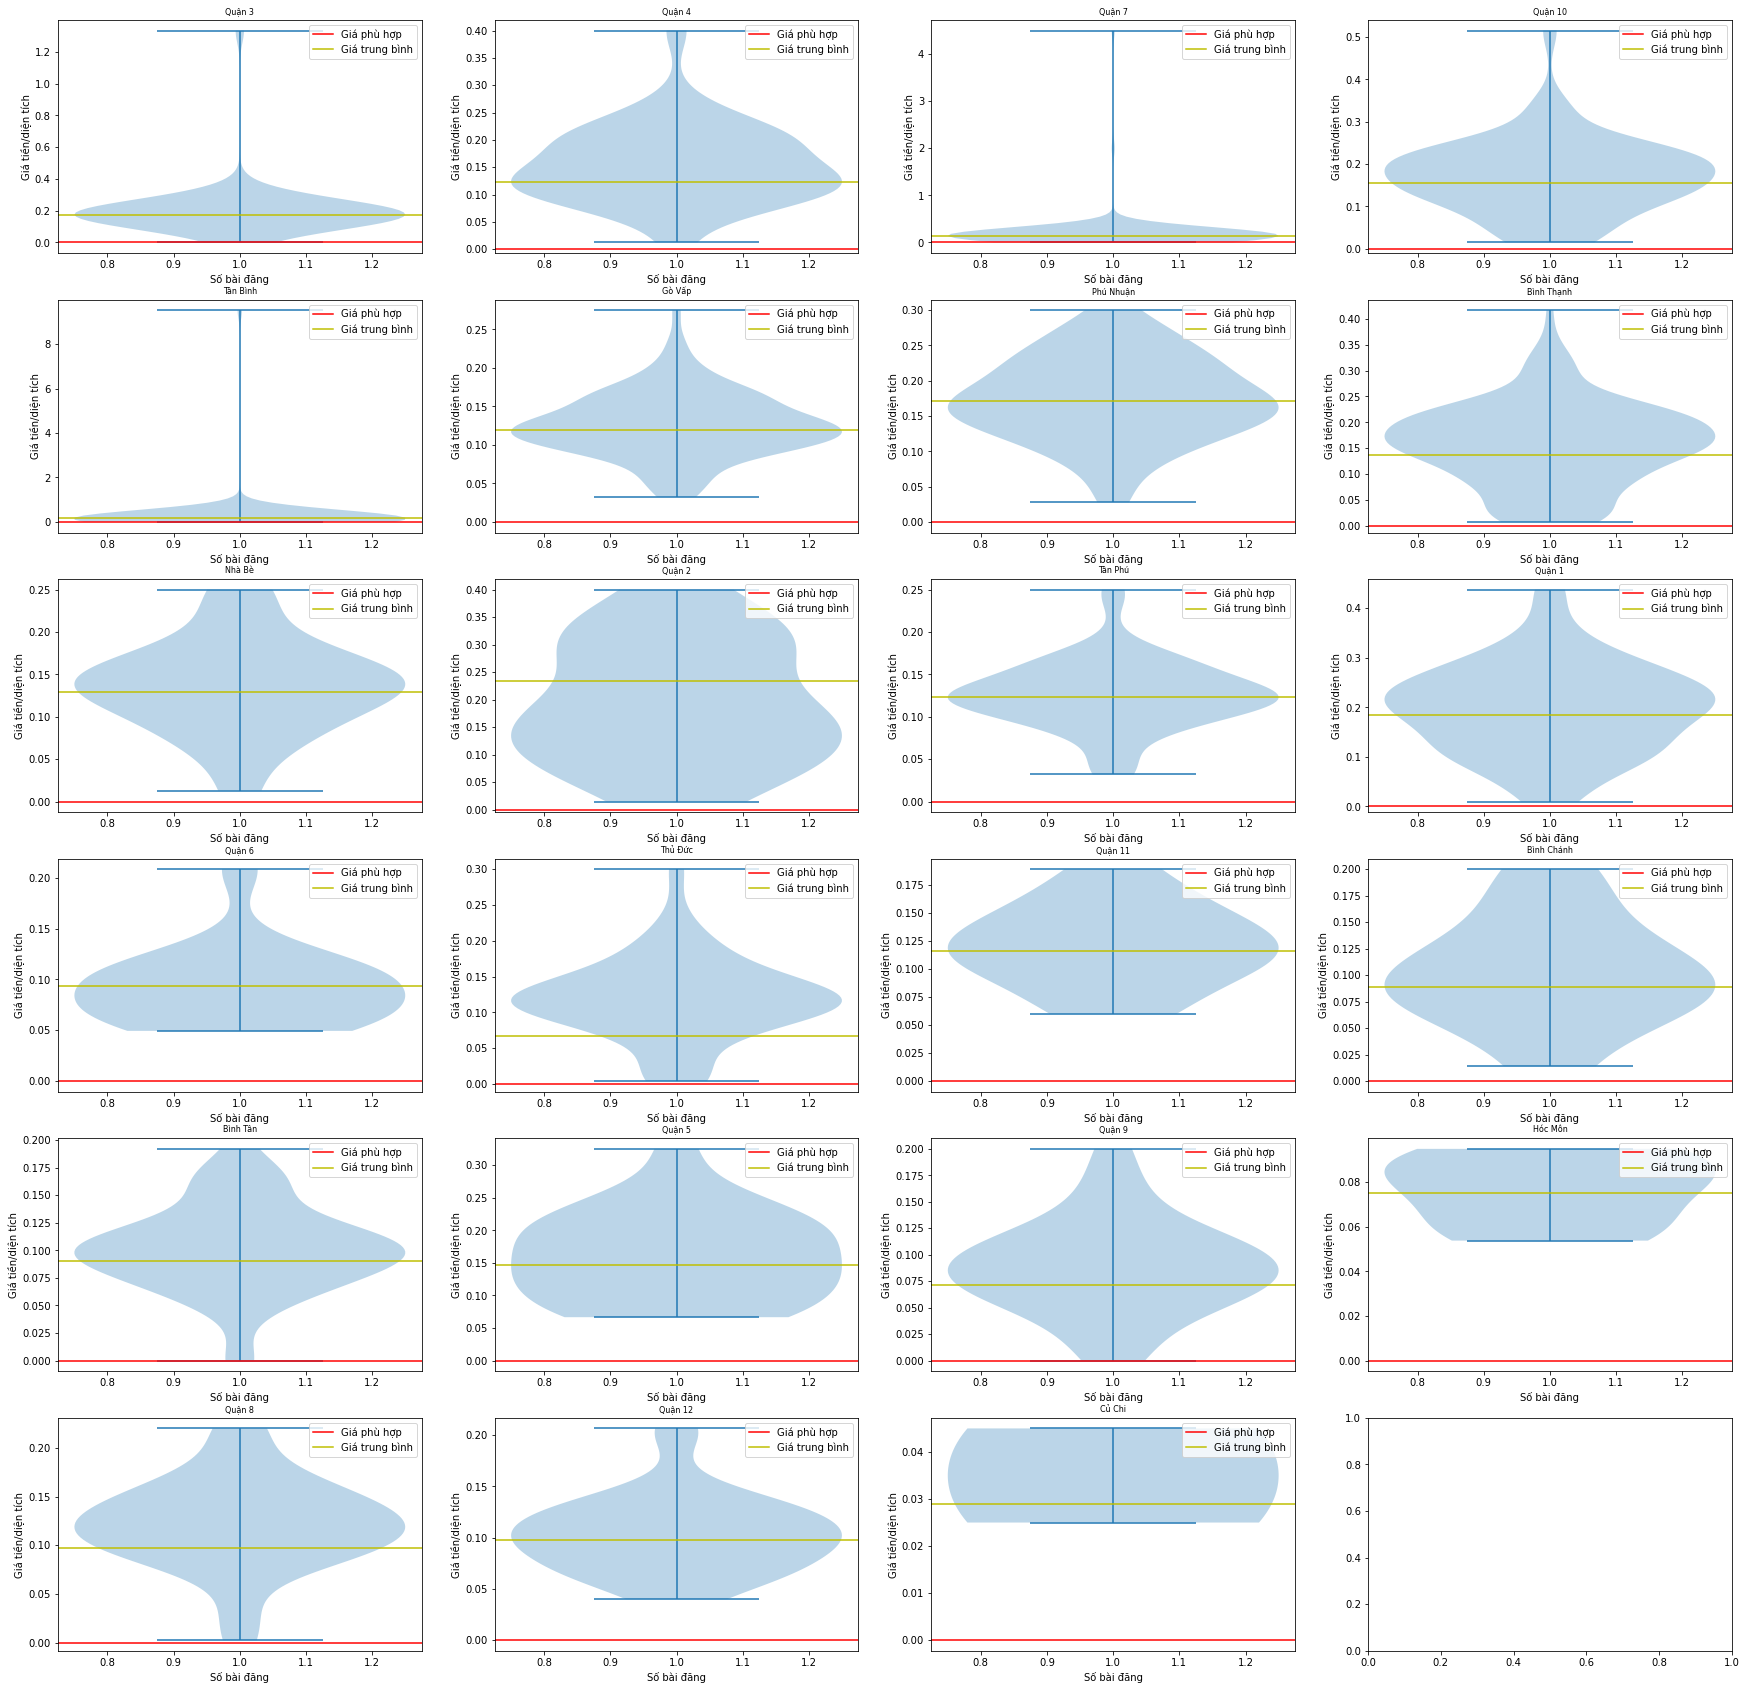

In [93]:
quan = pd.unique(df_info.District)
print ("QUAN: ",type (quan))
df_info["Date"] = pd.to_datetime(df_info["Date"],format = "%d/%m/%Y ",errors = 'coerce')

array = {}
process = df_info.dropna()
# Get today
today = date.today()

today = np.datetime64(today)
#Xét theo quận

for i in quan:
    arr = {}
    district = process[process['District'] == i]
    price = district['Price(Triệu/tháng)']
    priceMedium = price.sum()/len(process[process['District'] == i]['Price(Triệu/tháng)'])
    square =  district['Square(m²)']
    squareMedium = square.sum()/len(process[process['District'] == i]['Price(Triệu/tháng)'])
    # Giá trung bình
    Medimum = priceMedium/squareMedium
    first = district.values[0]
    first = first[2]/first[3]
    min = float (abs(first-Medimum))
    Get = district.head(1).values
    #Lưu price/square của một bài đăng
    each = []
    #choose price
    choosePrice = 0
    for j in district.values:
        checkDate = pd.to_datetime(j[6],format = "%d/%m/%Y ",errors = 'coerce')
        count = today - checkDate
        if (count.days < 1000000):
            if (len(j) != 7):
                print (j)
            if pd.notna(j[2]) & pd.notna(j[3]):
                #giá một bài
                cal =  j[2]/j[3]
                each.append(cal)
                cal = float (cal)
                find = float(abs(cal-squareMedium))
                if find <= float(min):
                    choosePrice = cal
                    min = find
                    Get = j
                    # print (first)
    arr['Price'] = priceMedium
    arr['Square'] = squareMedium
    arr['Price/square medium'] = priceMedium/squareMedium
    arr['Price/square'] = each
    arr['Choosen inf'] = Get
    arr['Choosen Price/square'] = choosePrice

    array[i] = arr

#Tạo biểu đồ

lenarray =  len(array) +1 
if (lenarray % 2 != 0 ):
    lenarray = lenarray +1
lenarray = int (math.sqrt(lenarray))
fig ,axis = plt.subplots(6,4,figsize =(30, 30))
run = 0  
for i in range(0,6 ):
    for j in range(0,4 ):
        if run != len(quan) :
            axis[i][j].violinplot([array[quan[run]]["Price/square"],])
            axis[i][j].set_xlabel("Số bài đăng")
            axis[i][j].set_ylabel("Giá tiền/diện tích")
            axis[i][j].set_title(quan[run], fontsize = 8)
            x = array[quan[run]]['Choosen Price/square']
            x1 = array[quan[run]]['Price/square medium']
            axis[i][j].axhline(y = x, color = 'r', linestyle = '-',label ='Giá phù hợp')
            axis[i][j].axhline(y = x1, color = 'y', linestyle = '-',label ='Giá trung bình')
            axis[i][j].legend()
            run += 1

#Test
# print ("Test: ", process[process['District'] == "Quận 3"].values[1][2])

# for j in array:
#     print (array[j]["Price/square"])

# Data
for j in array:
    # print (set(array[j]["Choosen inf"]))
    if (type(array[j]["Choosen inf"])!= float):
        print("================================== ")
        print (j)
        print("Giá trung bình: ", array[j]["Price/square medium"])
        print("Giá phù hợp: ", array[j]["Choosen Price/square"])
        print("*Thông tin* ")
        print("ID: ", array[j]["Choosen inf"][0][0])
        print("Tiêu đề: ", array[j]["Choosen inf"][0][1])
        print ("Giá (triệu/tháng): ", array[j]["Choosen inf"][0][2] )
        print ("Diện tích: ", array[j]["Choosen inf"][0][3]) 
        print ('Ngày đăng: ', array[j]["Choosen inf"][0][6])
        print (" ")
